In [1]:
import pandas as pd
import numpy as np
import datetime
import scipy
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import pyplot

In [2]:
# Reading the Data

In [3]:
hotel_data = pd.read_csv("Train-1554810061973.csv")
hotel_data.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","Good hotel, charges for internet access The Ma...",good
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",Small but adequate rooms If you have an early ...,good
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","Better than average, some noisy rooms I have s...",good
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",Ordinary Although it is highly rated in these ...,bad


# Exporatory Data Analysis for the Data

In [4]:
# Describing the Data

In [5]:
hotel_data.describe()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
count,6287,6287,6287,6287,6287,6287
unique,6287,100,6100,1310,6287,3
top,Review_877,hotel_188,hotel_4370,"May 29, 2007",no sheet - this hotel is almost perfect I woul...,good
freq,1,521,4,21,1,3213


In [6]:
hotel_data.dtypes

Reviewid      object
Hotelid       object
userid        object
Date          object
reviewtext    object
Sentiment     object
dtype: object

In [7]:
# Changing the data type of the date column from object to datetime

In [8]:
hotel_data['Date'] =  pd.to_datetime(hotel_data['Date'],
                              format='%b %d, %Y')

In [9]:
hotel_data.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad


In [10]:
hotel_data.dtypes

Reviewid              object
Hotelid               object
userid                object
Date          datetime64[ns]
reviewtext            object
Sentiment             object
dtype: object

In [11]:
# Creating New columns

In [12]:
hotel_data["Day"] = hotel_data.Date.apply(lambda row:row.day)

In [13]:
hotel_data["Month"] = hotel_data.Date.apply(lambda row:row.month)

In [14]:
hotel_data["Year"] = hotel_data.Date.apply(lambda row:row.year)

In [15]:
hotel_data.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,Day,Month,Year
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,16,11,2007
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good,30,10,2007
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good,12,10,2007
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good,31,8,2007
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad,18,7,2007


In [16]:
hotel_data.dtypes

Reviewid              object
Hotelid               object
userid                object
Date          datetime64[ns]
reviewtext            object
Sentiment             object
Day                    int64
Month                  int64
Year                   int64
dtype: object

In [17]:
# Changing the data type of  Day, Month, Year to string 

In [18]:
hotel_data['Day'] = hotel_data['Day'].astype('category')
hotel_data['Month'] = hotel_data['Month'].astype('category')
hotel_data['Year'] = hotel_data['Year'].astype('category')

In [19]:
hotel_data.dtypes

Reviewid              object
Hotelid               object
userid                object
Date          datetime64[ns]
reviewtext            object
Sentiment             object
Day                 category
Month               category
Year                category
dtype: object

In [20]:
# Unique Number of Hotels
len(hotel_data.Hotelid.unique())

100

In [21]:
# Total number of unique userid
len(hotel_data.userid.unique())

6100

In [22]:
# Sentiment counts
hotel_data['Sentiment'].value_counts()

good         3213
excellent    1971
bad          1103
Name: Sentiment, dtype: int64

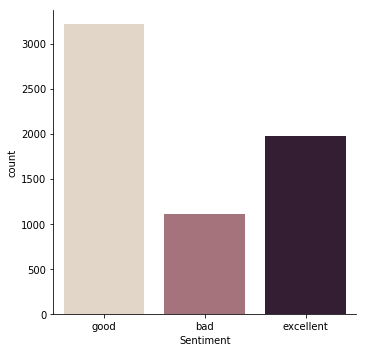

In [23]:
# Sentiment counts
sns.catplot(x="Sentiment", kind="count", palette="ch:.25", data=hotel_data);

#### Some insights provided by the above Plot is the distribution of the count of Sentiments 
#### Good reviews are the highest, good can be safely considered average rating, leaving scope for some unhappiness to the user


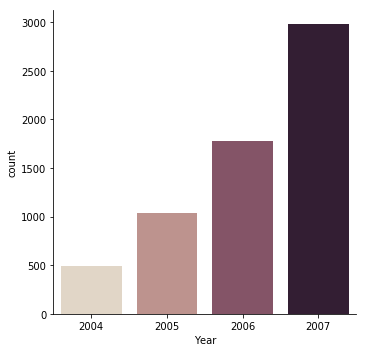

In [24]:
# Number of reviews according to year
sns.catplot(x="Year", kind="count", palette="ch:.25", data=hotel_data);

#### Insights provided by the plot above is distribution of the total Reviews according to Year 
#### Number of travellers is increasing every year
#### Number of travellers giving feedback also has increased
#### Number of travellers prefering online method over the conventional methods for booking hotels

In [25]:
## Total number of Reviews for each Hotel ID in descending order

In [26]:
hotel_data.Hotelid.value_counts(ascending=False).head(10)

hotel_188    521
hotel_147    203
hotel_152    194
hotel_182    183
hotel_169    174
hotel_200    159
hotel_186    159
hotel_189    157
hotel_143    152
hotel_135    139
Name: Hotelid, dtype: int64

Text(0.5, 1.0, 'Top 10 Hotels which got highest reviews')

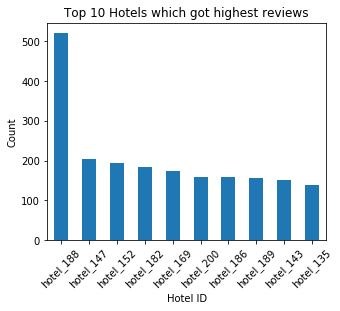

In [27]:
# Let's look at the top 10 reviewed Hotels
Hotel_Name_count = hotel_data.Hotelid.value_counts()
Hotel_Name_count[:10].plot(kind='bar',figsize=(5,4),rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('Top 10 Hotels which got highest reviews')

#### In the plot above we see the most popular or highly visited hotels
#### Clearly hotel with hotel id hotel_188 has the highest customers followed by hotel_147

In [28]:
# Best reviewes for Hotels
hotel_data[hotel_data.Sentiment == 'excellent']["Hotelid"].value_counts(ascending=False).head(10)

hotel_188    239
hotel_147    106
hotel_200    103
hotel_186     87
hotel_189     78
hotel_135     65
hotel_146     55
hotel_181     55
hotel_169     51
hotel_115     48
Name: Hotelid, dtype: int64

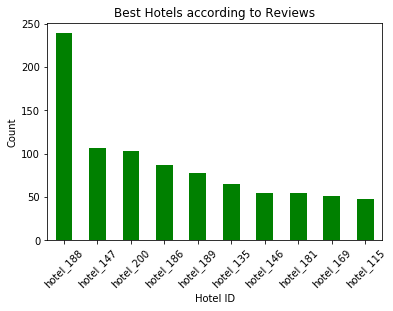

In [29]:
# Best reviewes for Hotels
best_hotels = hotel_data[hotel_data.Sentiment == 'excellent']["Hotelid"].value_counts(ascending=False).head(10)
best_hotels.plot(kind="bar",color = "Green",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('Best Hotels according to Reviews')
plt.show()

#### hotels with hotel id hotel_188 and hotel_147 have got the highest excellent ratings in the reviews
#### hotel with hotel_id hotel_200 has third highest  excellent ratings 

In [30]:
# # Average reviewes for Hotels
hotel_data[hotel_data.Sentiment == 'good']["Hotelid"].value_counts(ascending=False).head(10)

hotel_188    244
hotel_182    106
hotel_152     96
hotel_147     89
hotel_141     85
hotel_143     84
hotel_118     78
hotel_169     75
hotel_150     72
hotel_181     68
Name: Hotelid, dtype: int64

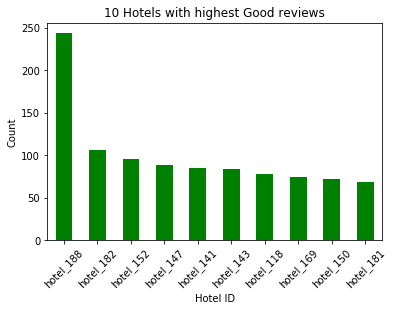

In [31]:
# Average reviewes for Hotels
avg_hotels = hotel_data[hotel_data.Sentiment == 'good']["Hotelid"].value_counts(ascending=False).head(10)
avg_hotels.plot(kind="bar",color = "Green",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('10 Hotels with highest Good reviews')
plt.show()

#### hotel with hotel id hotel_188 has the highest good ratings
#### hotel with hotel id hotel_182 has less excellent ratings but second highest good ratings, lot of scope for improvement
#### hotel with hotel id hotel_147 is in the top 10 list 
#### hotel with hotel id hotel_200 is in the top 50 list

In [32]:
hotel_data[hotel_data.Sentiment == 'bad']["Hotelid"].value_counts(ascending=False).head(10)

hotel_152    54
hotel_169    48
hotel_182    39
hotel_188    38
hotel_127    38
hotel_134    36
hotel_150    25
hotel_143    23
hotel_148    23
hotel_118    23
Name: Hotelid, dtype: int64

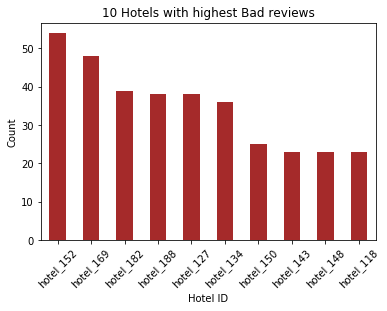

In [33]:
# Bad review for Hotels
bad_hotels =hotel_data[hotel_data.Sentiment == 'bad']["Hotelid"].value_counts(ascending=False).head(10)
bad_hotels.plot(kind="bar",color="brown",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('10 Hotels with highest Bad reviews')
plt.show()

#### overall the bad ratings are less compared to excellent and good ratings 
#### hotel with hotel id hotel_188 does appear with significant number of bad ratings
#### hotel with hotel id hotel_200 does not appear in this list

In [34]:
## Total count of both Good and Bad reviews for each Hotel,
## which needs Hotelier's attention

In [35]:
hotel_data[(hotel_data.Sentiment == 'good') |(hotel_data.Sentiment == 'bad')]["Hotelid"].value_counts(ascending=False).head(10)

hotel_188    282
hotel_152    150
hotel_182    145
hotel_169    123
hotel_143    107
hotel_141    102
hotel_118    101
hotel_150     97
hotel_147     97
hotel_127     94
Name: Hotelid, dtype: int64

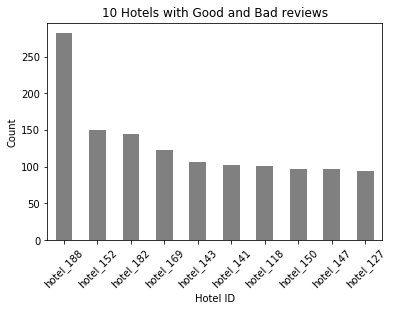

In [36]:
# Good and Bad review for Hotels
good_bad_hotels =hotel_data[(hotel_data.Sentiment == 'good') |(hotel_data.Sentiment == 'bad')]["Hotelid"].value_counts(ascending=False).head(10)
good_bad_hotels.plot(kind="bar",color="gray",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('10 Hotels with Good and Bad reviews')
plt.show()

In [37]:
#### The hotels in this list have a lot of improvement to do. considering good as average rating

In [38]:
hotel_data[(hotel_data.Sentiment == 'good') |(hotel_data.Sentiment == 'excellent')]["Hotelid"].value_counts(ascending=False).head(10)

hotel_188    483
hotel_147    195
hotel_200    153
hotel_186    153
hotel_182    144
hotel_189    142
hotel_152    140
hotel_135    130
hotel_143    129
hotel_169    126
Name: Hotelid, dtype: int64

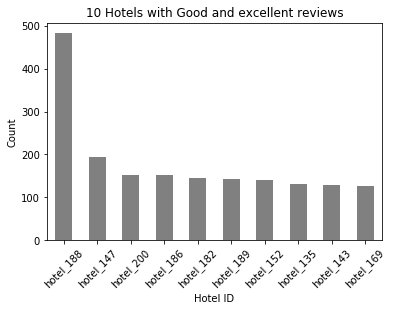

In [39]:
# Good and Bad review for Hotels
good_exc_hotels =hotel_data[(hotel_data.Sentiment == 'good') |(hotel_data.Sentiment == 'excellent')]["Hotelid"].value_counts(ascending=False).head(10)
good_exc_hotels.plot(kind="bar",color="gray",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('10 Hotels with Good and excellent reviews')
plt.show()

#### hotel with hotel id hotel_200 is present in this list, but has got very less bad reviews overall the BEST PERFORMING HOTEL 

In [40]:
# Distribution of Sentiment for each hotel
hotel_data.groupby(['Hotelid','Sentiment']).count()

Reviewid  userid  Date  reviewtext  Day  Month  Year
Hotelid   Sentiment                                                      
hotel_101 bad               5       5     5           5    5      5     5
          excellent         6       6     6           6    6      6     6
          good             15      15    15          15   15     15    15
hotel_102 bad               6       6     6           6    6      6     6
          excellent        20      20    20          20   20     20    20
          good             37      37    37          37   37     37    37
hotel_103 bad               8       8     8           8    8      8     8
          excellent        18      18    18          18   18     18    18
          good             20      20    20          20   20     20    20
hotel_104 bad              10      10    10          10   10     10    10
          excellent        11      11    11          11   11     11    11
          good             26      26    26          26   26     26    26
hotel_105 bad               6       6     6           6    6      6     6
          excellent         7       7     7           7    7      7     7
          good             17      17    17          17   17     17    17
hotel_106 bad               6       6     6           6    6      6     6
          excellent         7       7     7           7    7      7     7
          good             18      18    18          18   18     18    18
hotel_107 bad               3       3     3           3    3      3     3
          excellent         5       5     5           5    5      5     5
          good             10      10    10          10   10     10    10
hotel_108 bad               4       4     4           4    4      4     4
          good              5       5     5           5    5      5     5
hotel_109 bad               2       2     2           2    2      2     2
          excellent         1       1     1           1    1      1     1
          good              8       8     8           8    8      8     8
hotel_110 bad               6       6     6           6    6      6     6
          excellent         2       2     2           2    2      2     2
          good             21      21    21          21   21     21    21
hotel_111 bad              12      12    12          12   12     12    12
...                       ...     ...   ...         ...  ...    ...   ...
hotel_190 bad               9       9     9           9    9      9     9
          excellent         9       9     9           9    9      9     9
          good             16      16    16          16   16     16    16
hotel_191 excellent         9       9     9           9    9      9     9
          good             16      16    16          16   16     16    16
hotel_192 bad               2       2     2           2    2      2     2
          excellent         2       2     2           2    2      2     2
          good              8       8     8           8    8      8     8
hotel_193 bad               6       6     6           6    6      6     6
          excellent         1       1     1           1    1      1     1
          good              5       5     5           5    5      5     5
hotel_194 bad              12      12    12          12   12     12    12
          excellent        16      16    16          16   16     16    16
          good             56      56    56          56   56     56    56
hotel_195 bad               4       4     4           4    4      4     4
          good              7       7     7           7    7      7     7
hotel_196 bad              13      13    13          13   13     13    13
          good              4       4     4           4    4      4     4
hotel_197 bad              10      10    10          10   10     10    10
          excellent         1       1     1           1    1      1     1
          good             11      11    11          11   11     11    11
hotel_198 bad            

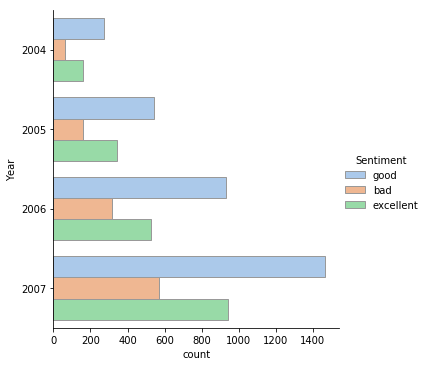

In [41]:
# Different reviews per year categorized according to Sentiment
sns.catplot(y="Year", hue="Sentiment", kind="count",
            palette="pastel", edgecolor=".6",
            data=hotel_data);

In [42]:
# Total Total Word Count in reviews for each hotel
print("Total Word Count in Reviews")
hotel_data.groupby('Hotelid').apply(lambda x: x.reviewtext.apply(lambda x: len(x.split())).sum())

Total Word Count in Reviews


Hotelid
hotel_101     3510
hotel_102    12147
hotel_103     7997
hotel_104    13283
hotel_105     4208
hotel_106     4636
hotel_107     2345
hotel_108      828
hotel_109     1815
hotel_110     3621
hotel_111     3291
hotel_112     3008
hotel_113     2570
hotel_114     2827
hotel_115    14042
hotel_116     2441
hotel_117     2464
hotel_118    31467
hotel_119     2213
hotel_120     8316
hotel_121     1014
hotel_122     6385
hotel_123    16150
hotel_124     3585
hotel_125       21
hotel_126     5481
hotel_127    23499
hotel_128     9256
hotel_129     6263
hotel_130    23793
             ...  
hotel_171    12212
hotel_172     6928
hotel_173    12817
hotel_174     2880
hotel_175    13325
hotel_176     8214
hotel_177    14827
hotel_178     5333
hotel_179     2931
hotel_180     4758
hotel_181    19848
hotel_182    29108
hotel_183      813
hotel_184     3283
hotel_185     2064
hotel_186    24184
hotel_187     3353
hotel_188    85880
hotel_189    27502
hotel_190     4465
hotel_191     2380
hote

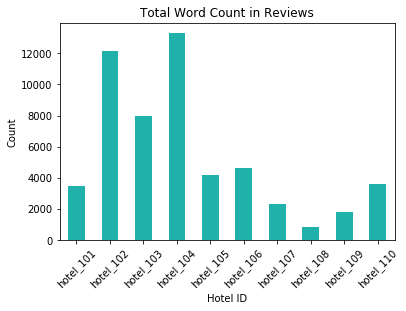

In [217]:
word_count = hotel_data.groupby('Hotelid').apply(lambda x: x.reviewtext.apply(lambda x: len(x.split())).sum()).head(10)
word_count.plot(kind="bar",color="lightseagreen",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('Total Word Count in Reviews')
plt.show()

In [43]:
# Lets examine Total review count per hotel
print("Reviews Count")
hotel_data.groupby(['Hotelid'])['reviewtext'].count()

Reviews Count


Hotelid
hotel_101     26
hotel_102     63
hotel_103     46
hotel_104     47
hotel_105     30
hotel_106     31
hotel_107     18
hotel_108      9
hotel_109     11
hotel_110     29
hotel_111     23
hotel_112     25
hotel_113     23
hotel_114     18
hotel_115     62
hotel_116     15
hotel_117     18
hotel_118    134
hotel_119     12
hotel_120     53
hotel_121     15
hotel_122     36
hotel_123    100
hotel_124     22
hotel_125      3
hotel_126     25
hotel_127    122
hotel_128     63
hotel_129     42
hotel_130    130
            ... 
hotel_171     77
hotel_172     41
hotel_173     69
hotel_174     14
hotel_175     70
hotel_176     49
hotel_177     78
hotel_178     26
hotel_179     21
hotel_180     27
hotel_181    133
hotel_182    183
hotel_183      3
hotel_184     14
hotel_185      9
hotel_186    159
hotel_187     28
hotel_188    521
hotel_189    157
hotel_190     34
hotel_191     25
hotel_192     12
hotel_193     12
hotel_194     84
hotel_195     11
hotel_196     17
hotel_197     22
hotel_

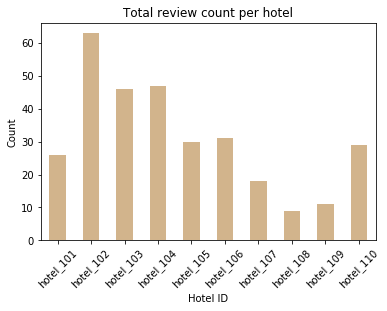

In [56]:
review_count = hotel_data.groupby(['Hotelid'])['reviewtext'].count().head(10)
review_count.plot(kind="bar",color="tan",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('Total review count per hotel')
plt.show()

In [35]:
print("Reviews and Sentiment Count")
hotel_data.groupby(['Hotelid','Sentiment'])['reviewtext'].count()

Reviews and Sentiment Count


Hotelid    Sentiment
hotel_101  bad            5
           excellent      6
           good          15
hotel_102  bad            6
           excellent     20
           good          37
hotel_103  bad            8
           excellent     18
           good          20
hotel_104  bad           10
           excellent     11
           good          26
hotel_105  bad            6
           excellent      7
           good          17
hotel_106  bad            6
           excellent      7
           good          18
hotel_107  bad            3
           excellent      5
           good          10
hotel_108  bad            4
           good           5
hotel_109  bad            2
           excellent      1
           good           8
hotel_110  bad            6
           excellent      2
           good          21
hotel_111  bad           12
                       ... 
hotel_190  bad            9
           excellent      9
           good          16
hotel_191  excellent      9

In [61]:
# Let's look at the top 10 dates when highest Reviews were given across different hotels 
hotel_data.Date.value_counts()

2007-05-29    21
2007-08-30    19
2007-08-14    18
2007-08-21    18
2007-08-24    18
2007-09-25    17
2007-10-30    17
2007-04-11    17
2007-03-02    16
2007-07-30    16
2006-10-24    16
2007-12-27    16
2007-10-18    16
2006-09-05    16
2007-08-28    16
2007-07-09    15
2007-09-02    15
2006-10-09    15
2007-12-04    15
2007-11-06    15
2007-08-13    15
2007-07-24    15
2006-08-01    15
2007-08-01    15
2007-10-22    14
2007-07-20    14
2007-11-01    14
2007-04-10    14
2007-08-20    14
2007-08-09    14
              ..
2005-02-04     1
2004-12-18     1
2005-08-18     1
2004-11-16     1
2004-05-28     1
2005-12-16     1
2004-10-18     1
2004-04-26     1
2005-07-21     1
2004-02-10     1
2005-11-23     1
2005-08-27     1
2004-04-12     1
2005-07-26     1
2005-06-30     1
2004-10-04     1
2006-02-10     1
2004-10-27     1
2004-12-20     1
2005-01-01     1
2004-10-20     1
2004-08-22     1
2005-12-30     1
2004-03-28     1
2004-09-25     1
2004-07-12     1
2006-06-15     1
2004-06-25    

Text(0.5, 1.0, 'Top 10 dates when highest Reviews were given')

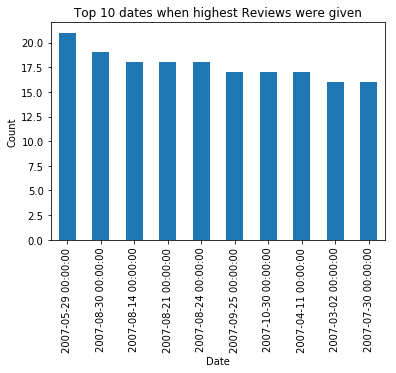

In [218]:
Review_Date_count = hotel_data.Date.value_counts()
Review_Date_count[:10].plot(kind='bar').plot(kind='bar',figsize=(5,4),rot=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Top 10 dates when highest Reviews were given')

In [64]:
# Lets see the frequency of review per user id per hotel
hotel_data.userid.value_counts().head(10)

hotel_4370     4
hotel_6904     3
hotel_7227     3
hotel_10131    3
hotel_10250    3
hotel_6527     3
hotel_5009     3
hotel_8820     3
hotel_9743     3
hotel_7596     3
Name: userid, dtype: int64

Text(0.5, 1.0, 'Frequency of review per user id per hotel')

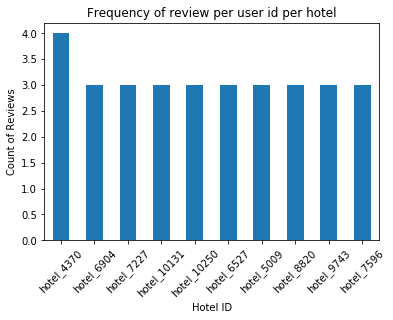

In [65]:
Reviewers_freq = hotel_data.userid.value_counts()
Reviewers_freq[:10].plot(kind='bar',rot=45,)
plt.xlabel('Hotel ID')
plt.ylabel('Count of Reviews')
plt.title('Frequency of review per user id per hotel')

# Text Analysis using Spacy

In [117]:
%matplotlib inline
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
from spacy import displacy
import os, pkgutil, json, urllib
from IPython.display import IFrame
from IPython.core.display import display, HTML

In [118]:
nlp = spacy.load('en')

In [119]:
# Creating a new column of the parsed form of reviewtext column
hotel_data['parsed'] = hotel_data.reviewtext.apply(nlp)

In [120]:
hotel_data.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,Day,Month,Year,parsed
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,16,11,2007,"(Nice, Marriot, , View, of, my, king, be..."
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good,30,10,2007,"(Good, hotel, ,, charges, for, internet, acces..."
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good,12,10,2007,"(Small, but, adequate, rooms, If, you, have, a..."
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good,31,8,2007,"(Better, than, average, ,, some, noisy, rooms,..."
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad,18,7,2007,"(Ordinary, Although, it, is, highly, rated, in..."


In [121]:
# Checking The properties of the parsed column (or tokens) 
dir(hotel_data['parsed'])

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 

###  Checking for Tokens created by Spacy

In [122]:
# first token of the review text
hotel_data['parsed'][0]

Nice Marriot       View of my king bed room

In [123]:
# first token of the first review of the review text 
hotel_data['parsed'][0][0]

Nice

In [124]:
# One hundred fifety fifth review of the review text
hotel_data['parsed'][154]

great place great hotel with beautiful golf facilities...we really enjoyed our stay. My wife loved the beach and the spa facilities, The food and the restaurants were the Best in town.For a relaxing vacation or a visit with the family this place has it all. I also saw a wedding celebration at the pool and it seems that they also cater for special events and banquets and groups.we will be back for valentines day and spend another romantic get away..

In [125]:
# first token of the One hundred fifety fifth review of the review text
hotel_data['parsed'][154][0]

great

In [126]:
# last review of the review text  
hotel_data['parsed'][len(hotel_data['parsed'])-1]

Terrific Hotel in the Union Square/Grammercy Park Area The Hotel Giraffe is a very, very good hotel in an area where there are relatively few hotels. The location was just about perfect for my visit--I needed to be near my friends @ the W Union Square. The hotel is immaculately maintained. The lobby is extremely spacious for a relatively small hotel, and the decor/furninshings are tasteful, comfortable, and welcoming. The staff are, for the most part, excellent, though I did encounter one bellman  one maid who were subpar. My room was nicely appointed, and I really enjoyed having a balcony. My room, although not huge, was definitely big enough for needs. I particularly liked the creative  subtle use of color in the decor scheme. This hotel offers some wonderful little perks that many hotels @ this level simply do not--somplimentary continental breakfast, evening wine  cheese, and daily passes to a nearby gym. The lobby has coffee, tea, expresso, juice, and cookies available all day. It

In [127]:
# Checking for sentences 

In [128]:
# List of sentences of the one hundred fifety fifth review 
list(hotel_data['parsed'][154].sents)

[great place great hotel with beautiful golf facilities,
 ...we really enjoyed our stay.,
 My wife loved the beach and the spa facilities, The food and the restaurants were the Best in town.,
 For a relaxing vacation or a visit with the family this place has it all.,
 I also saw a wedding celebration at the pool and it seems that they also cater for special events and banquets and groups.we will be back for valentines day and spend another romantic get away..]

#### Visualizing the dependencies of tokens

In [225]:
sentence_spans154 = list(hotel_data['parsed'][154].sents)
options = {"compact": True, "bg": "#FFFFFF",
           "color": "black", "font": "Source Sans Pro"}
displacy.render(sentence_spans154, style="dep", options=options)

In [130]:
# List of sentences of the nine hundred seventy seventh review 
list(hotel_data['parsed'][976].sents)

[Millenium Biltmore - an unfriendly place We stayed at the Biltmore from July 12th to the 15th 2006.,
 As a family (my husband, myself and three children aged 4, 11 and 16) travelling from Australia, we'd just had 3 days at Disneyland staying at a hotel in Anaheim.,
 When we moved from Anaheim to the Biltmore I immediately felt we didn't fit in there.,
 The ladies at reception were extremely unfriendly and when we asked them a question it was answered extremely reluctantly.,
 My husband and I had a drink in the gallery bar (the children were in the room watching TV) and the barman was also not very friendly.,
 The concierge, a wonderful man called James, made up for the unfriendly staff with his charming and friendly manner and he gave us all sorts of helpful tips, such as the location of a market nearby where we could purchase fruit for the children (we bought 5 bananas for US 80 cents!,
 wow!,
 in Australia currently bananas cost about AU$2.50 each!!!),
 and advice on what sort of to

In [224]:
# Visualizing the dependencies for nine hundred seventy seventh review 
sentence_spans976 = list(hotel_data['parsed'][976].sents)
options = {"compact": True, "bg": "#FFFFFF",
           "color": "black", "font": "Source Sans Pro"}
displacy.render(sentence_spans976, style="dep", options=options)

### Part of Speech Tagging

In [132]:
# getting all tags for the first review
all_tags = {w.pos: w.pos_ for w in hotel_data['parsed'][0]}
all_tags

{96: 'PROPN', 103: 'SPACE', 85: 'ADP', 90: 'DET', 92: 'NOUN'}

In [133]:
# getting all tags for the nine hundred seventy seventh review
all_tags = {w.pos: w.pos_ for w in hotel_data['parsed'][976]}
all_tags

{96: 'PROPN',
 97: 'PUNCT',
 90: 'DET',
 84: 'ADJ',
 92: 'NOUN',
 95: 'PRON',
 100: 'VERB',
 85: 'ADP',
 93: 'NUM',
 89: 'CCONJ',
 87: 'AUX',
 86: 'ADV',
 94: 'PART',
 91: 'INTJ',
 99: 'SYM'}

In [134]:
# all tags of first sentence of one hundred fifty fifth review
for word in list(hotel_data['parsed'][154].sents)[0]:  
    print(word, word.tag_)

great JJ
place NN
great JJ
hotel NN
with IN
beautiful JJ
golf NN
facilities NNS


In [135]:
# all tags of the first statement of nine hundred seventy seventh review
for word in list(hotel_data['parsed'][976].sents)[0]:  
    print(word, word.tag_)

Millenium NNP
Biltmore NNP
- :
an DT
unfriendly JJ
place NN
We PRP
stayed VBD
at IN
the DT
Biltmore NNP
from IN
July NNP
12th NN
to IN
the DT
15th JJ
2006 CD
. .


In [136]:
# Showing the word and word tag for the third statement of nine hundred seventy seventh review
for word in list(hotel_data['parsed'][976].sents)[2]:  
    print(word, word.tag_)

When WRB
we PRP
moved VBD
from IN
Anaheim NNP
to IN
the DT
Biltmore NNP
I PRP
immediately RB
felt VBD
we PRP
did VBD
n't RB
fit VB
in RB
there RB
. .


In [ ]:
# Comparing the tags of review 977 and 3457 

In [249]:
review976=hotel_data['parsed'][976]
review976POS = pd.Series(review976.count_by(spacy.attrs.POS))/len(review976)

In [251]:
review3456=hotel_data['parsed'][3456]
review3456POS = pd.Series(review3456.count_by(spacy.attrs.POS))/len(review3456)


In [253]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

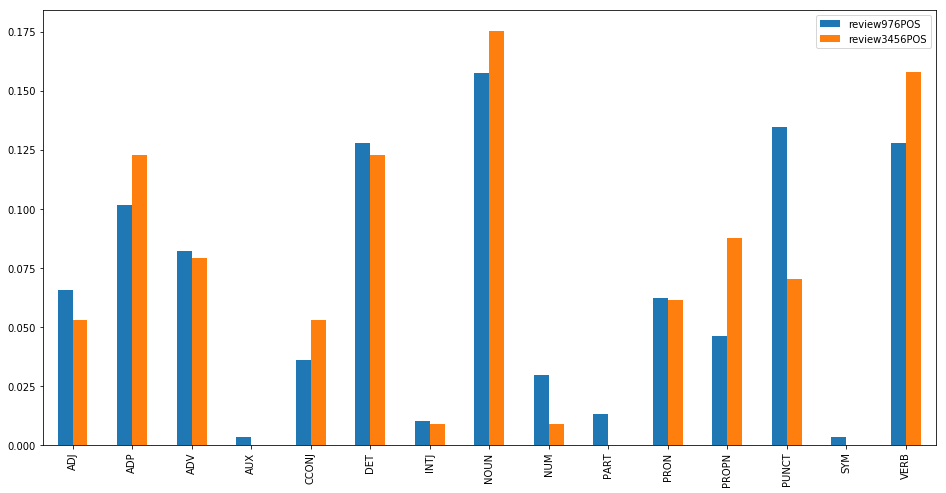

In [255]:
rcParams['figure.figsize'] = 16, 8
df = pd.DataFrame([review976POS, review3456POS], index=['review976POS', 'review3456POS'])
df.columns = [all_tags[column] for column in df.columns]
df.T.plot(kind='bar')

In [137]:
## basic preprocessing and text cleaning function.

In [138]:
#define some parameters  
noisy_pos_tags = ['PROP']
min_token_length = 2

In [139]:
#Function to check if the token is a noise or not  
def isNoise(token):     
    is_noise = False
    if token.pos_ in noisy_pos_tags:
        is_noise = True 
    elif token.is_stop == True:
        is_noise = True
    elif len(token.string) <= min_token_length:
        is_noise = True
    return is_noise 

In [140]:
def cleanup(token, lower = True):
    if lower:
       token = token.lower()
    return token.strip()

In [141]:
# top unigrams used in the reviews with index 976 
from collections import Counter
cleaned_list = [cleanup(word.string) for word in hotel_data['parsed'][976] if not isNoise(word)]
Counter(cleaned_list) .most_common(20)

[('biltmore', 4),
 ('children', 4),
 ('unfriendly', 3),
 ('hotel', 3),
 ('room', 3),
 ('stayed', 2),
 ('husband', 2),
 ('australia', 2),
 ('anaheim', 2),
 ('extremely', 2),
 ('bar', 2),
 ('friendly', 2),
 ('bananas', 2),
 ('millenium', 1),
 ('place', 1),
 ('july', 1),
 ('12th', 1),
 ('15th', 1),
 ('2006', 1),
 ('family', 1)]

In [142]:
# top unigrams used in the reviews with index 3656 
cleaned_list = [cleanup(word.string) for word in hotel_data['parsed'][3656] if not isNoise(word)]
Counter(cleaned_list) .most_common(20)

[('base', 2),
 ('away', 2),
 ('great', 2),
 ('ideal', 1),
 ('stayed', 1),
 ('grosvenor', 1),
 ('suites', 1),
 ('june', 1),
 ('july', 1),
 ('2004', 1),
 ('perfect', 1),
 ('explore', 1),
 ('san', 1),
 ('francisco', 1),
 ('centre', 1),
 ('cable', 1),
 ('car', 1),
 ('line', 1),
 ('far', 1),
 ('staff', 1)]

#### Entity Detection

In [143]:
# Entity Detection such as person, location, organization, dates, numerals, etc.

In [144]:
# for review with index 976
labels = set([w.label_ for w in hotel_data['parsed'][976].ents]) 
for label in labels: 
    entities = [cleanup(e.string, lower=False) for e in hotel_data['parsed'][976].ents if label==e.label_] 
    entities = list(set(entities)) 
    print(label,entities)

DATE ['16', '4', 'July 12th to the 15th 2006', '3 days', 'the middle of summer', '11']
ORDINAL ['first']
CARDINAL ['three', '5']
GPE ['LA', 'Anaheim', 'US', 'Australia', 'Biltmore']
PRODUCT ['Biltmore']
MONEY ['10', '80 cents']
FAC ['Disneyland']
PERSON ['James']


In [145]:
# Visualizing the entities in revew with index 976

displacy.render(hotel_data['parsed'][976], style="ent")

In [231]:
# for revew with index 1876
labels = set([w.label_ for w in hotel_data['parsed'][1876].ents]) 
for label in labels: 
    entities = [cleanup(e.string, lower=False) for e in hotel_data['parsed'][1876].ents if label==e.label_] 
    entities = list(set(entities)) 
    print(label,entities)

DATE ['the next day']
LOC ['the East Coast']
FAC ['the Grand View', 'the Ferry Building']
CARDINAL ['half', 'two']
ORDINAL ['36th']
PRODUCT ['Marriott']
TIME ['midnight', 'the evening', 'around 1:00 p.m.', 'A night-cap']
ORG ['China Town', 'Sheraton']
PERSON ['Hyatt', 'Wingate Inn', 'Linens']


In [232]:
# Visualizing the entities in revew with index 1876
displacy.render(hotel_data['parsed'][1876], style="ent")

#### Dependency Parsing

In [ ]:
# Depenency parsing is a language processing technique that allows us to determine the meaning of a sentence by analyzing how it’s constructed to determine how the individual words relate to each other.

In [149]:
## Defining a function for searching a particular word
def word_search (sentence, token):
    reviews = [sent for sent in sentence.sents if token in sent.string.lower()]
    swrds = []
    swrds.extend(reviews)
    return swrds

In [205]:
hotel = [sent for sent in hotel_data['parsed'][765].sents if 'hotel' in sent.string.lower()]

In [206]:
# create dependency tree
sentence = hotel[2]
for word in sentence:
    print(word, ': ', str(list(word.children)))

The :  []
hotel :  [The]
made :  [hotel, sure, .]
sure :  [located]
that :  []
our :  []
room :  [our]
was :  []
located :  [that, room, was, on, distract]
on :  [floor]
a :  []
non :  []
- :  [non]
business :  [-]
floor :  [a, business]
as :  []
to :  []
not :  []
distract :  [as, to, not, travelers]
the :  []
many :  []
business :  []
travelers :  [the, many, business]
. :  []


In [150]:
# extracting all review sentences that contains the term - hotel
(hotel_data.parsed.apply(lambda x:word_search(x, 'hotel'))).sort_values(ascending=False)

460     [(My, husband, had, seen, the, resort, on, Gre...
2391    [(In, addition, to, the, usual, fare, that, yo...
152     [(The, hotel, charged, something, like, $, 5, ...
579     [(I, thought, the, water, was, cloudy, in, the...
1153    [(A, Hilton, with, bed, bugs, ..., for, the, p...
3140    [(Loved, the, elegance, of, the, old, hotel, ....
4360    [(Breakfast, food, at, the, hotel, was, decent...
1144    [(I, knew, there, was, a, Metro, entrance, on,...
5375    [(I, saw, some, great, hotels, right, on, Time...
146     [(Pool, got, crowded, on, weekends, ,, so, we,...
1136    [(The, door, staff, were, courteous, and, poli...
608     [(That, desk, clerk, could, be, termed, a, cre...
2843    [(Joie, de, Vivre, has, opened, a, new, hotel,...
5820    [(It, turns, out, that, hotels, booked, on, Ho...
5689    [(There, are, many, bars, around, the, hotel, ...
90      [(The, only, negative, thing, was, the, outsid...
1787    [(All, of, this, topped, with, the, indifferen...
4979    [(Hote

In [185]:
(hotel_data.parsed.apply(lambda x:word_search(x, 'restaurant'))).sort_values(ascending=False)

4366    [(When, he, got, to, the, restaurant, area, ,,...
1220    [(There, is, a, restaurant, and, a, separate, ...
1227    [(Dining, :, The, hotel, has, a, restaurant, c...
5970    [(I, did, not, use, any, of, the, restaurants,...
6259    [(The, hotel, is, in, the, ', Curry, Hill, ', ...
2391    [(The, Marriott, 's, location, is, convenientl...
1673    [(There, is, a, restaurant, on, the, first, fl...
3928    [(We, ate, at, the, hotel, restaurant, one, ev...
1165    [(The, buffet, is, so, extensive, that, it, wi...
6041    [(That, mall, houses, the, more, mid, -, line,...
1439    [(The, Pal, has, a, very, formal, restaurant, ...
4640    [(I, have, never, written, a, letter, of, comp...
740     [(Instead, of, apologizing, for, not, informin...
2903    [(*, Restaurant, downstairs, (, Max, 's, ), ha...
5448    [(We, did, not, use, the, restaurant, ,, but, ...
768     [(The, magic, of, tipping!So, got, to, enjoy, ...
5465    [(It, 's, a, smaller, restaurant, ,, excellent...
3952    [(The,

In [203]:
(hotel_data.parsed.apply(lambda x:word_search(x, 'parking'))).sort_values(ascending=False)

5970    [(Parking, is, $, 18, dollars, a, day, for, va...
1220    [(Be, prepared, to, pay, a, daily, parking, fe...
722     [(It鈥檚, not, made, very, clear, that, parking,...
5904    [(He, actually, came, DOWN, to, the, parking, ...
579     [(do, think, they, need, more, handicapped, pa...
1227    [(Self, Parking, in, one, of, their, two, unde...
4559    [(Oh, yea, ,, the, parking, is, 20, dollars, a...
2391    [(The, normal, rate, for, Thanksgiving, weeken...
1800    [(Other, reviewers, here, have, commented, on,...
3077    [(If, you, must, drive, ,, consider, parking, ...
3869    [(As, a, Marriott, member, ,, I, was, also, of...
5680    [(If, have, a, car, ,, the, valet, parking, he...
3019    [(The, other, negative, ,, to, be, avoided, if...
2441    [(From, the, bellman, to, the, clerk, at, the,...
2086    [(We, also, had, a, rental, car, which, we, we...
2414    [(Small, rooms, ,, good, location, ,, horrible...
2050    [(But, ,, if, I, had, paid, the, high, price, ...
4316    [(If, 

In [204]:
(hotel_data.parsed.apply(lambda x:word_search(x, 'food'))).sort_values(ascending=False)

2822    [(The, food, is, sublime, .), (I, like, my, bi...
442            [(The, food, and, service, are, great, .)]
152     [(The, food, ,, while, a, bit, pricy, ,, was, ...
947     [(The, Sports, Bar, in, the, hotel, was, very,...
3928    [(We, ate, at, the, hotel, restaurant, one, ev...
628     [(Staff, guided, us, to, good, food, and, publ...
6259    [(One, of, the, brighest, spots, about, Giraff...
1227    [(Also, on, the, 3rd, floor, is, a, gift, shop...
2903    [(*, Restaurant, downstairs, (, Max, 's, ), ha...
5441    [(We, found, a, nice, convenience, /, grocery,...
1153    [(It, 's, because, they, serve, caviar, and, s...
1165    [(The, room, service, food, was, average, (, e...
3952    [(The, Pool, Bar, is, as, expensive, as, previ...
606     [(Service, and, food, both, consistently, exce...
5798    [(The, food, in, the, restaurant, was, phenome...
3077    [(Also, a, bit, of, advice, ,, do, n't, move, ...
6122    [(The, hotel鈥檚, on, -, site, lounge, and, rest...
6057    [(Ther

#### Checking all adjectives used with a word 

In [207]:
# Define a function to check all adjectives used with a word
def pos_words (sentence, token, ptag):
    sentences = [sent for sent in sentence.sents if token in sent.string]
    pwrds = []
    for sent in sentences: 
        for word in sent: 
            if token in word.string:
                pwrds.extend([child.string.strip() for child in word.children if child.pos_ == ptag])
    return Counter(pwrds).most_common(10)

In [208]:
# Checking all adjectives used with Hotel
(hotel_data.parsed.apply(lambda x:pos_words(x, 'hotel', "ADJ"))).sort_values(ascending=False)

4241                             [(wrong, 1), (more, 1)]
4253                                        [(wrong, 1)]
1334                                        [(wrong, 1)]
1456                                        [(worth, 1)]
4230          [(worst, 1), (whole, 1), (alternative, 1)]
3990                         [(worst, 1), (terrible, 1)]
4592                          [(worst, 1), (regular, 1)]
4768                            [(worst, 1), (large, 1)]
3334                            [(worst, 1), (Dirty, 1)]
2761                                        [(worst, 1)]
1703                                        [(worst, 1)]
1337                                        [(worst, 1)]
1344                                        [(worst, 1)]
2921                                        [(worst, 1)]
157                                         [(worst, 1)]
149                                         [(worst, 1)]
3754                                        [(worst, 1)]
2753                           

In [209]:
# Checking all adjectives used with Restaurant
(hotel_data.parsed.apply(lambda x:pos_words(x, 'restaurant', "ADJ"))).sort_values(ascending=False)

3396              [(wonderful, 1), (full, 1)]
854            [(wonderful, 1), (Spanish, 1)]
2682           [(wonderful, 1), (Chinese, 1)]
2787                         [(wonderful, 1)]
1456                         [(wonderful, 1)]
2292                         [(wonderful, 1)]
948                          [(wonderful, 1)]
6162                         [(wonderful, 1)]
1522                         [(wonderful, 1)]
576                          [(wonderful, 1)]
4651                         [(wonderful, 1)]
3794                         [(wonderful, 1)]
625     [(western, 1), (many, 1), (great, 1)]
506                            [(western, 1)]
2781             [(vegetarian, 1), (good, 1)]
2791                        [(vegetarian, 1)]
2795                        [(vegetarian, 1)]
2575         [(various, 1), (inexpensive, 1)]
4815           [(various, 1), (expensive, 1)]
3952                           [(various, 1)]
4332                           [(various, 1)]
1151                             [

In [210]:
# Checking all adjectives used with Parking
(hotel_data.parsed.apply(lambda x:pos_words(x, 'parking', "ADJ"))).sort_values(ascending=False)

3742                                         [(valet, 1)]
6029                                   [(unprotected, 1)]
1764                                   [(underground, 1)]
4161                                         [(total, 1)]
4044                                      [(terrible, 1)]
3519                                    [(supervised, 1)]
17                                          [(secure, 1)]
2776                               [(safe, 1), (free, 1)]
1400                                       [(regular, 1)]
2665    [(reasonable, 1), (quiet, 1), (safe, 1), (free...
6101                                    [(reasonable, 1)]
2745                              [(quiet, 1), (free, 1)]
2982                                        [(public, 1)]
229                                         [(public, 1)]
3505                                        [(public, 1)]
2866                                        [(public, 1)]
2911                                        [(public, 1)]
2612          

In [211]:
# Checking all adjectives used with Bathroom
(hotel_data.parsed.apply(lambda x:pos_words(x, 'bathroom', "ADJ"))).sort_values(ascending=False)

4194    [(wonderful, 1), (large, 1), (separate, 1)]
800                                [(wonderful, 1)]
4280                      [(whole, 1), (entire, 1)]
2272                                   [(white, 1)]
3332                                   [(weird, 1)]
569                                 [(upstairs, 1)]
4815                     [(upscale, 1), (large, 1)]
2733                                [(unheated, 1)]
3364                                    [(ugly, 1)]
1004                                    [(tiny, 1)]
3317                                    [(tiny, 1)]
2065                                    [(tiny, 1)]
42                                      [(tiny, 1)]
5332                                    [(tiny, 1)]
1449                                    [(tiny, 1)]
5372                                    [(tiny, 1)]
4527                                    [(tiny, 1)]
1524                                    [(tiny, 1)]
4505                                    [(tiny, 1)]
2009        

In [212]:
# Checking all adjectives used with Internet
(hotel_data.parsed.apply(lambda x:pos_words(x, 'internet', "ADJ"))).sort_values(ascending=False)

3092                   [(worth, 1)]
5305                [(wireless, 1)]
2259                [(wireless, 1)]
3279                [(wireless, 1)]
4886                [(wireless, 1)]
221                 [(wireless, 1)]
6014                [(wireless, 1)]
2520                [(wireless, 1)]
2297                [(wireless, 1)]
3376                [(wireless, 1)]
955                 [(wireless, 1)]
635                 [(wireless, 1)]
5190                [(wireless, 1)]
5899                [(wireless, 1)]
5038                [(wireless, 1)]
2104                [(wireless, 1)]
5729                [(wireless, 1)]
2489                [(wireless, 1)]
505                 [(wireless, 1)]
2701                [(wireless, 1)]
3363                [(wireless, 1)]
2787                [(wireless, 1)]
5967                [(wireless, 1)]
2036                [(wireless, 1)]
1940                [(wireless, 1)]
2632                [(wireless, 1)]
121                 [(wireless, 1)]
3315                [(wirele

In [213]:
# Checking all adjectives used with Staff
(hotel_data.parsed.apply(lambda x:pos_words(x, 'staff', "ADJ"))).sort_values(ascending=False)

4601    [(worst, 1), (incompetent, 1), (unprofessional...
1092                         [(wonderful, 1), (lucky, 1)]
6279                       [(wonderful, 1), (helpful, 1)]
6187                         [(wonderful, 1), (front, 1)]
2527                      [(wonderful, 1), (excelent, 1)]
1507                          [(wonderful, 1), (best, 1)]
4989                                     [(wonderful, 1)]
4563                                     [(wonderful, 1)]
3799                                     [(wonderful, 1)]
1799                                     [(wonderful, 1)]
1438                                     [(wonderful, 1)]
1911                                     [(wonderful, 1)]
2912                                     [(wonderful, 1)]
786                                          [(whole, 1)]
1537                                         [(whole, 1)]
4401                                         [(whole, 1)]
5172                                         [(whole, 1)]
454           

In [223]:
# Dependencies on Noun Phrases

In [220]:
# Checking the dependencies for nine hundred seventy seventh review 
for chunk in hotel_data['parsed'][976].noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,chunk.root.head.text)

Millenium Biltmore Biltmore ROOT Biltmore
an unfriendly place place appos Biltmore
We We nsubj stayed
the Biltmore Biltmore pobj at
July 12th 12th pobj from
a family family pobj As
my husband husband nsubj aged
myself myself appos husband
three children children conj myself
Australia Australia pobj from
we we nsubj had
3 days days dobj had
Disneyland Disneyland pobj at
a hotel hotel pobj at
Anaheim Anaheim pobj in
we we nsubj moved
Anaheim Anaheim pobj from
the Biltmore Biltmore pobj to
I I nsubj felt
we we nsubj fit
The ladies ladies nsubj were
reception reception pobj at
we we nsubj asked
them them dative asked
a question question dobj asked
it it nsubjpass answered
My husband husband nsubj had
I I conj husband
a drink drink dobj had
the gallery bar bar pobj in
the children children nsubj were
the room room pobj in
TV TV dobj watching
the barman barman nsubj was
The concierge concierge nsubj made
a wonderful man man appos concierge
the unfriendly staff staff pobj for
his charming and

In [234]:
# Visualizing the dependencies for nine hundred seventy seventh review 
displacy.render(hotel_data['parsed'][976], style="dep", jupyter= True)

In [233]:
# Checking the dependencies for one thousand four hundred fifety third review
for chunk in hotel_data['parsed'][1453].noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,chunk.root.head.text)

Great Location Location ROOT Location
We We nsubj stayed
the Hotel Palomar Palomar pobj at
a few days days pobj after
Healdsburg Healdsburg pobj in
the hotel hotel nsubj is
the quaintest or funkiest area area pobj in
town town pobj of
I I nsubj say
we we nsubj were
the location location pobj with
The building building nsubjpass connected
a shopping mall mall pobj to
a fabulous food court court pobj with
a quick bite bite pobj for
a movie theater theater attr is
the street street pobj across
all public transportation transportation pobj across
your door door pobj outside
We We nsubj were
all areas areas dobj access
SF SF pobj of
friends friends pobj with
dinners dinners pobj for
etc in a few minutes minutes dobj access
Check-in in nsubj was
a breeze breeze attr was
All the staff staff nsubj were
Our room room nsubj was
(8th Floor Floor ROOT Floor
The bathroom bathroom nsubj was
the 2 days days pobj for
The housekeeping service service nsubj was
We We nsubj use
the gym gym dobj use
busin

In [235]:
# Visualizing the dependencies for one thousand four hundred fifety third review
displacy.render(hotel_data['parsed'][1453], style="dep", jupyter= True)

#### Word Vector Representation

In [299]:
import en_core_web_lg

In [300]:
nlp = en_core_web_lg.load()

In [301]:
parking = nlp(u'parking')

In [302]:
# Word Vector for 'Parking'
print(parking.vector.shape)
print(parking.vector)

(300,)
[ 9.0726e-01 -7.1584e-02  1.0164e-01 -5.3527e-01  2.4844e-01  1.0670e-01
  4.0490e-02 -4.6550e-01 -6.6496e-01  2.5296e+00 -1.0674e-01  1.5276e-01
 -4.1519e-01  6.5366e-01 -7.7401e-01 -3.2346e-02 -2.2184e-01  1.8517e+00
  6.1072e-01 -1.1816e-02 -3.1363e-01  2.0808e-01  2.2790e-01 -3.5158e-01
  1.9133e-01 -1.9661e-01 -3.0259e-01 -1.0318e-01  8.0290e-02 -1.0391e-01
  5.6774e-01 -2.6096e-01 -2.2379e-01  1.2302e-01 -3.0347e-01 -1.2316e-01
  2.1627e-01  9.5927e-02 -8.7343e-02  4.1523e-01 -2.9173e-01 -9.9411e-02
  1.5273e-01  5.8515e-01 -7.0793e-01  2.8188e-01 -1.1400e-02 -3.1854e-01
 -6.9463e-01  3.3950e-01 -6.9349e-02 -3.8888e-01  4.7957e-01  1.0263e+00
 -1.5809e-02 -3.1540e-02 -2.4417e-01  2.7012e-01 -3.3988e-01  7.3072e-01
  7.2472e-02 -6.4591e-02  1.0099e-01  4.9397e-02  3.7456e-01  1.5316e-01
 -2.9485e-01 -1.0092e-01  2.3709e-01  8.5263e-01  3.6780e-01 -2.8952e-01
  7.8563e-01 -8.9958e-04 -1.1416e-01 -2.0456e-01  4.6422e-01 -1.0890e-01
  4.7514e-02  3.7252e-01 -1.4855e-01  4.0398

In [303]:
# Word Vector for 'staff'
staff = nlp(u'staff')
print(staff.vector.shape)
print(staff.vector)

(300,)
[-2.1905e-02 -1.8979e-01  3.5553e-01 -6.0816e-02 -5.1906e-01 -8.5889e-02
  8.2746e-02 -4.1862e-01 -8.6533e-02  3.3396e+00 -1.2230e-01 -3.2504e-01
 -1.2398e-01 -2.4626e-01 -1.7028e-01 -2.9082e-01 -1.7384e-01  1.0500e+00
 -6.9664e-02 -2.5740e-01 -1.7421e-02  2.5935e-01 -5.0088e-01 -6.9464e-01
  2.8373e-01  3.5007e-01 -8.3173e-01 -1.3748e-02  1.1615e-01 -5.7075e-01
 -1.0766e-01 -5.5316e-01 -3.2274e-01 -1.3972e-01 -3.2669e-01  2.2268e-01
  1.0579e-01  5.9063e-02 -2.9592e-01 -2.2262e-01  2.7784e-01  1.2793e-01
 -1.1608e-01 -1.2836e-01  1.7406e-01  4.9827e-02  3.0120e-01  5.1857e-01
  1.0837e-01  1.5294e-01  1.1582e-01 -6.7575e-01  5.6531e-01  4.3994e-02
 -3.1774e-01 -8.5299e-02 -2.6841e-01  4.0139e-01 -1.4822e-01  7.0652e-03
  6.2306e-02 -4.9824e-01 -1.5802e-04  1.6307e-01  6.3542e-02  5.5357e-02
 -1.5869e-01  6.1449e-01  2.4444e-01  8.1389e-01  2.5542e-01 -1.9296e-01
  1.9003e-02  3.9785e-01  6.0415e-01  2.6454e-01  4.9568e-01 -2.8938e-01
  1.4809e-01  5.1240e-01  2.0955e-01 -2.3081

In [304]:
# Word Vector for 'food'
food = nlp(u'food')
print(food.vector.shape)
print(food.vector)

(300,)
[-4.3512e-01  2.8351e-02  4.9110e-01 -3.5168e-01 -1.1578e-01  1.0369e+00
 -9.7550e-02  8.6624e-02 -1.7890e-01  2.4555e+00 -1.2798e+00  2.1074e-02
 -3.2250e-02  9.4673e-02 -1.4000e-01 -5.2143e-01  6.6447e-04  1.8051e+00
 -2.2604e-01  3.3227e-01  4.1163e-04  6.2654e-02  1.4973e-01 -5.0260e-01
  8.9701e-02 -2.6908e-01 -8.3594e-02 -1.6677e-01 -1.7036e-01 -3.2049e-01
 -2.3586e-01 -4.0395e-01  3.2683e-01 -2.1712e-01  9.8576e-02  4.7552e-01
  9.2994e-02 -6.1034e-02  1.2673e-01  6.0856e-01 -6.7936e-03 -2.1831e-01
  2.1751e-02 -2.4858e-01 -3.5244e-02  1.3692e-01 -3.7109e-01  5.4421e-01
  4.0017e-02  1.3992e-01  3.9967e-02 -3.1745e-01  2.4408e-01 -2.3550e-01
  2.4884e-01 -3.1929e-01  1.1282e-01 -1.0198e-02 -5.0538e-02 -1.1550e-01
  3.0273e-01 -6.1441e-01  1.6135e-02  1.0675e-02  1.5108e-01 -1.1759e+00
  9.7104e-02  7.1706e-02  1.9795e-01  2.7253e-01 -2.2122e-01  6.4478e-01
 -6.6252e-02 -2.9403e-01  1.6281e-01 -7.8554e-03 -1.4986e-01 -1.1364e-01
  3.6459e-01  1.3723e-01  4.6612e-01  2.6157